In [1]:
!pip install pywaffle
!pip install pgn2data
!pip install proplot
!pip install --upgrade ipython


  Using cached fontawesomefree-6.5.1-py3-none-any.whl.metadata (824 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 3.4 MB/s eta 0:00:003.3 MB/s eta 0:00:01
Using cached pywaffle-1.1.0-py2.py3-none-any.whl (30 kB)
Using cached fontawesomefree-6.5.1-py3-none-any.whl (25.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.6 MB/s eta 0:00:0031m20.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 26.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 6.6 MB/s eta 0:00:00
  Using cached pgn2data-0.0.9-py3-none-any.whl.metadata (9.8 kB)
  Using cached chess-1.10.0-py3-none-any.whl.metadata (19 kB)
Using cached pgn2data-0.0.9-py3-none-any.whl (31 kB)
Using cached chess-1.10.0-py3-none-any.whl (154 kB)
  Using cached matplotlib-3.4.3.tar.gz (37.9 MB)
  Installing build dependencies ... done
  Getting requirements to b

In [2]:
from converter.pgn_data import PGNData
import pandas as pd
import numpy as np
import requests
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

In [3]:
requests.get('https://lichess.org/api/games/user/canijustlose')

<Response [200]>

In [5]:
username = "canijustlose"
pgn_data = PGNData("lichess_canijustlose.pgn")
pgn_data.export(moves_required=False)

INFO:pgn2data - log_time:initializing at...2024-02-23 01:57:05.640215
INFO:pgn2data - pgn_data class:Starting process..
INFO:pgn2data - process:Processing games only in file:lichess_canijustlose.pgn
INFO:pgn2data - pgn_data class:ending process..
INFO:pgn2data - log_time:time taken sec: 0.547594791976735 sec
INFO:pgn2data - log_time:time taken: 0.547594791976735 seconds, 
INFO:pgn2data - log_time:time started...2024-02-23 01:57:05.640215
INFO:pgn2data - log_time:time ended.....2024-02-23 01:57:06.188329


In [7]:
games = pd.read_csv('lichess_canijustlose_game_info.csv', encoding="latin1")
eco = pd.read_csv('eco_codes.csv', encoding="latin1")
games = games.drop(columns=['game_id', 'site', 'round', 'game_order', 'white_rating_diff', 'black_rating_diff', 'winner_elo', 'loser_elo', 'winner_loser_elo_diff',
                            'termination', 'time_control', 'variant', 'ply_count', 'date_created', 'file_name'])


In [55]:
# my_file = 'lichess_canijustlose_2024-01-18_game_info.csv'
# df = pd.read_csv(my_file)

In [8]:
games.head()

,event,date_played,white,black,result,white_elo,black_elo,white_title,black_title,winner,loser,eco,utc_date,utc_time
0,Rated Bullet game,2024.02.20,learnerel,canijustlose,1-0,1883,1899,NaN,NaN,learnerel,canijustlose,C40,2024.02.20,07:19:49
1,Rated Rapid game,2024.02.19,artibarti,canijustlose,1-0,1777,1780,NaN,NaN,artibarti,canijustlose,C30,2024.02.19,07:39:00
2,Rated Rapid game,2024.02.19,canijustlose,Amatsuhiko,1-0,1749,1701,NaN,NaN,canijustlose,Amatsuhiko,B01,2024.02.19,07:37:22
3,Rated Blitz game,2024.02.12,usman_42,canijustlose,1/2-1/2,1624,1667,NaN,NaN,draw,draw,C50,2024.02.12,06:01:06
4,Rated Bullet game,2024.02.08,canijustlose,Steffen-5,0-1,1911,1917,NaN,NaN,Steffen-5,canijustlose,B20,2024.02.08,05:40:22


In [9]:
#making new column with the results
# games['group_name_result'] = games['winner'].apply(lambda x: 'won' if x == username else ('lost' if x != username else 'draw'))
games['group_name_result'] = games['winner'].apply(
    lambda x: 'won' if x == username else ('draw' if x == 'draw' else 'lost'))
games = games.assign(group_name_result = games['group_name_result'])


In [10]:
games['group_name_color'] = games['white'].apply(
    lambda x: 'white' if x == username else 'black')
games = games.assign(group_name_color = games['group_name_color'])

In [11]:
games.head(17)

,event,date_played,white,black,result,white_elo,black_elo,white_title,black_title,winner,loser,eco,utc_date,utc_time,group_name_result,group_name_color
0,Rated Bullet game,2024.02.20,learnerel,canijustlose,1-0,1883,1899,NaN,NaN,learnerel,canijustlose,C40,2024.02.20,07:19:49,lost,black
1,Rated Rapid game,2024.02.19,artibarti,canijustlose,1-0,1777,1780,NaN,NaN,artibarti,canijustlose,C30,2024.02.19,07:39:00,lost,black
2,Rated Rapid game,2024.02.19,canijustlose,Amatsuhiko,1-0,1749,1701,NaN,NaN,canijustlose,Amatsuhiko,B01,2024.02.19,07:37:22,won,white
3,Rated Blitz game,2024.02.12,usman_42,canijustlose,1/2-1/2,1624,1667,NaN,NaN,draw,draw,C50,2024.02.12,06:01:06,draw,black
4,Rated Bullet game,2024.02.08,canijustlose,Steffen-5,0-1,1911,1917,NaN,NaN,Steffen-5,canijustlose,B20,2024.02.08,05:40:22,lost,white
5,Rated Bullet game,2024.02.08,canijustlose,houmaan,0-1,1922,1930,NaN,NaN,houmaan,canijustlose,B50,2024.02.08,05:38:29,lost,white
6,Rated Bullet game,2024.02.08,zaktgt,canijustlose,1-0,1922,1935,NaN,NaN,zaktgt,canijustlose,C54,2024.02.08,05:36:43,lost,black
7,Rated Bullet game,2024.02.08,m5262,canijustlose,0-1,1912,1922,NaN,NaN,canijustlose,m5262,C50,2024.02.08,05:21:08,won,black
8,Rated Bullet game,2024.02.08,canijustlose,ZPac,0-1,1936,1911,NaN,NaN,ZPac,canijustlose,B00,2024.02.08,05:09:50,lost,white
9,Rated Bullet game,2024.02.08,canijustlose,crisis2k2,1-0,1923,1911,NaN,NaN,canijustlose,crisis2k2,C00,2024.02.08,05:07:39,won,white


In [12]:
# Results
games_count = games['group_name_result'].value_counts()   # Counting wins-losses-draws
games_count = games_count.to_frame().reset_index()        # Convert series to dataframe
games_count.columns = ['result', 'count']                 # Rename column names
print(games_count)

  result  count
0    won    285
1   lost    233
2   draw     22


In [14]:
# # Visualization
# fig = plt.figure(figsize=(14,8))
# fig.patch.set_facecolor('#FDD776')

# mpl.rcParams['font.size'] = 18
# mpl.rcParams['font.family'] = 'Ubuntu'

# plt.pie(games_count['count'],
#         explode=(0, 0, 0.2),
#         labels=['won', 'loss', 'draw'],
#         colors= ['lightskyblue', 'lightcoral', 'palegreen'],
#         autopct='%1.1f%%',
#         shadow=True,
#         startangle=200)

# plt.axis('equal')
# plt.title('Your Results Distribution', fontsize=35, fontweight="bold", color = 'brown')
# # plt.show()

### Counting total games

In [33]:
total_games = games.shape[0]
total_blitz_games = games.loc[games['event'] == 'Rated Blitz game'].shape[0]
total_rapid_games = games.loc[games['event'] == 'Rated Rapid game'].shape[0]
total_bullet_games = games.loc[games['event'] == 'Rated Bullet game'].shape[0]

print("Total number of games is: " + str(total_games))
print("Total number of Blitz games is: " + str(total_blitz_games))
print("Total number of Rapid games is: " + str(total_rapid_games))
print("Total number of Bullet games is: " + str(total_bullet_games))

Total number of games is: 540
Total number of Blitz games is: 168
Total number of Rapid games is: 25
Total number of Bullet games is: 314


### Getting current rating and peak rating

In [ ]:
#Convert date column into datetime
games.loc[:,'datetime'] = pd.to_datetime(games.utc_date.astype(str)+' '+games.utc_time.astype(str))
games.drop(columns=['utc_date', 'utc_time'], inplace = True)



In [90]:
valid_events = ['Rated Blitz game', 'Rated Rapid game', 'Rated Bullet game']
blitz_games_df = games.loc[games['event'] == 'Rated Blitz game']
rapid_games_df = games.loc[games['event'] == 'Rated Rapid game']
bullet_games_df = games.loc[games['event'] == 'Rated Bullet game']

# latest_datetime = [
#     (games['event'] == 'Rated Blitz game') & (games['datetime'].max())
# ]
cur = games.loc[(games.event == 'Rated Blitz games') & (games.datetime == games.datetime.max())]
bullet_games_df.head()


blitz_rating_current = blitz_games_df['datetime'].max() & blitz_games_df['
blitz_rating_current

Timestamp('2024-02-12 06:01:06')

In [62]:
games_color = games.groupby(['group_name_color','group_name_result']).size().reset_index(name='counts')   # Counting
# games_color = games_color.pivot(index="group_name_color",columns = "group_name_result",values="counts")   # Pivoting df

<ipython-input-63-5aabaf4fd33f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_eco['total'] = win_eco.groupby(['group_name_color', 'eco_name'])['counts'].transform('sum')


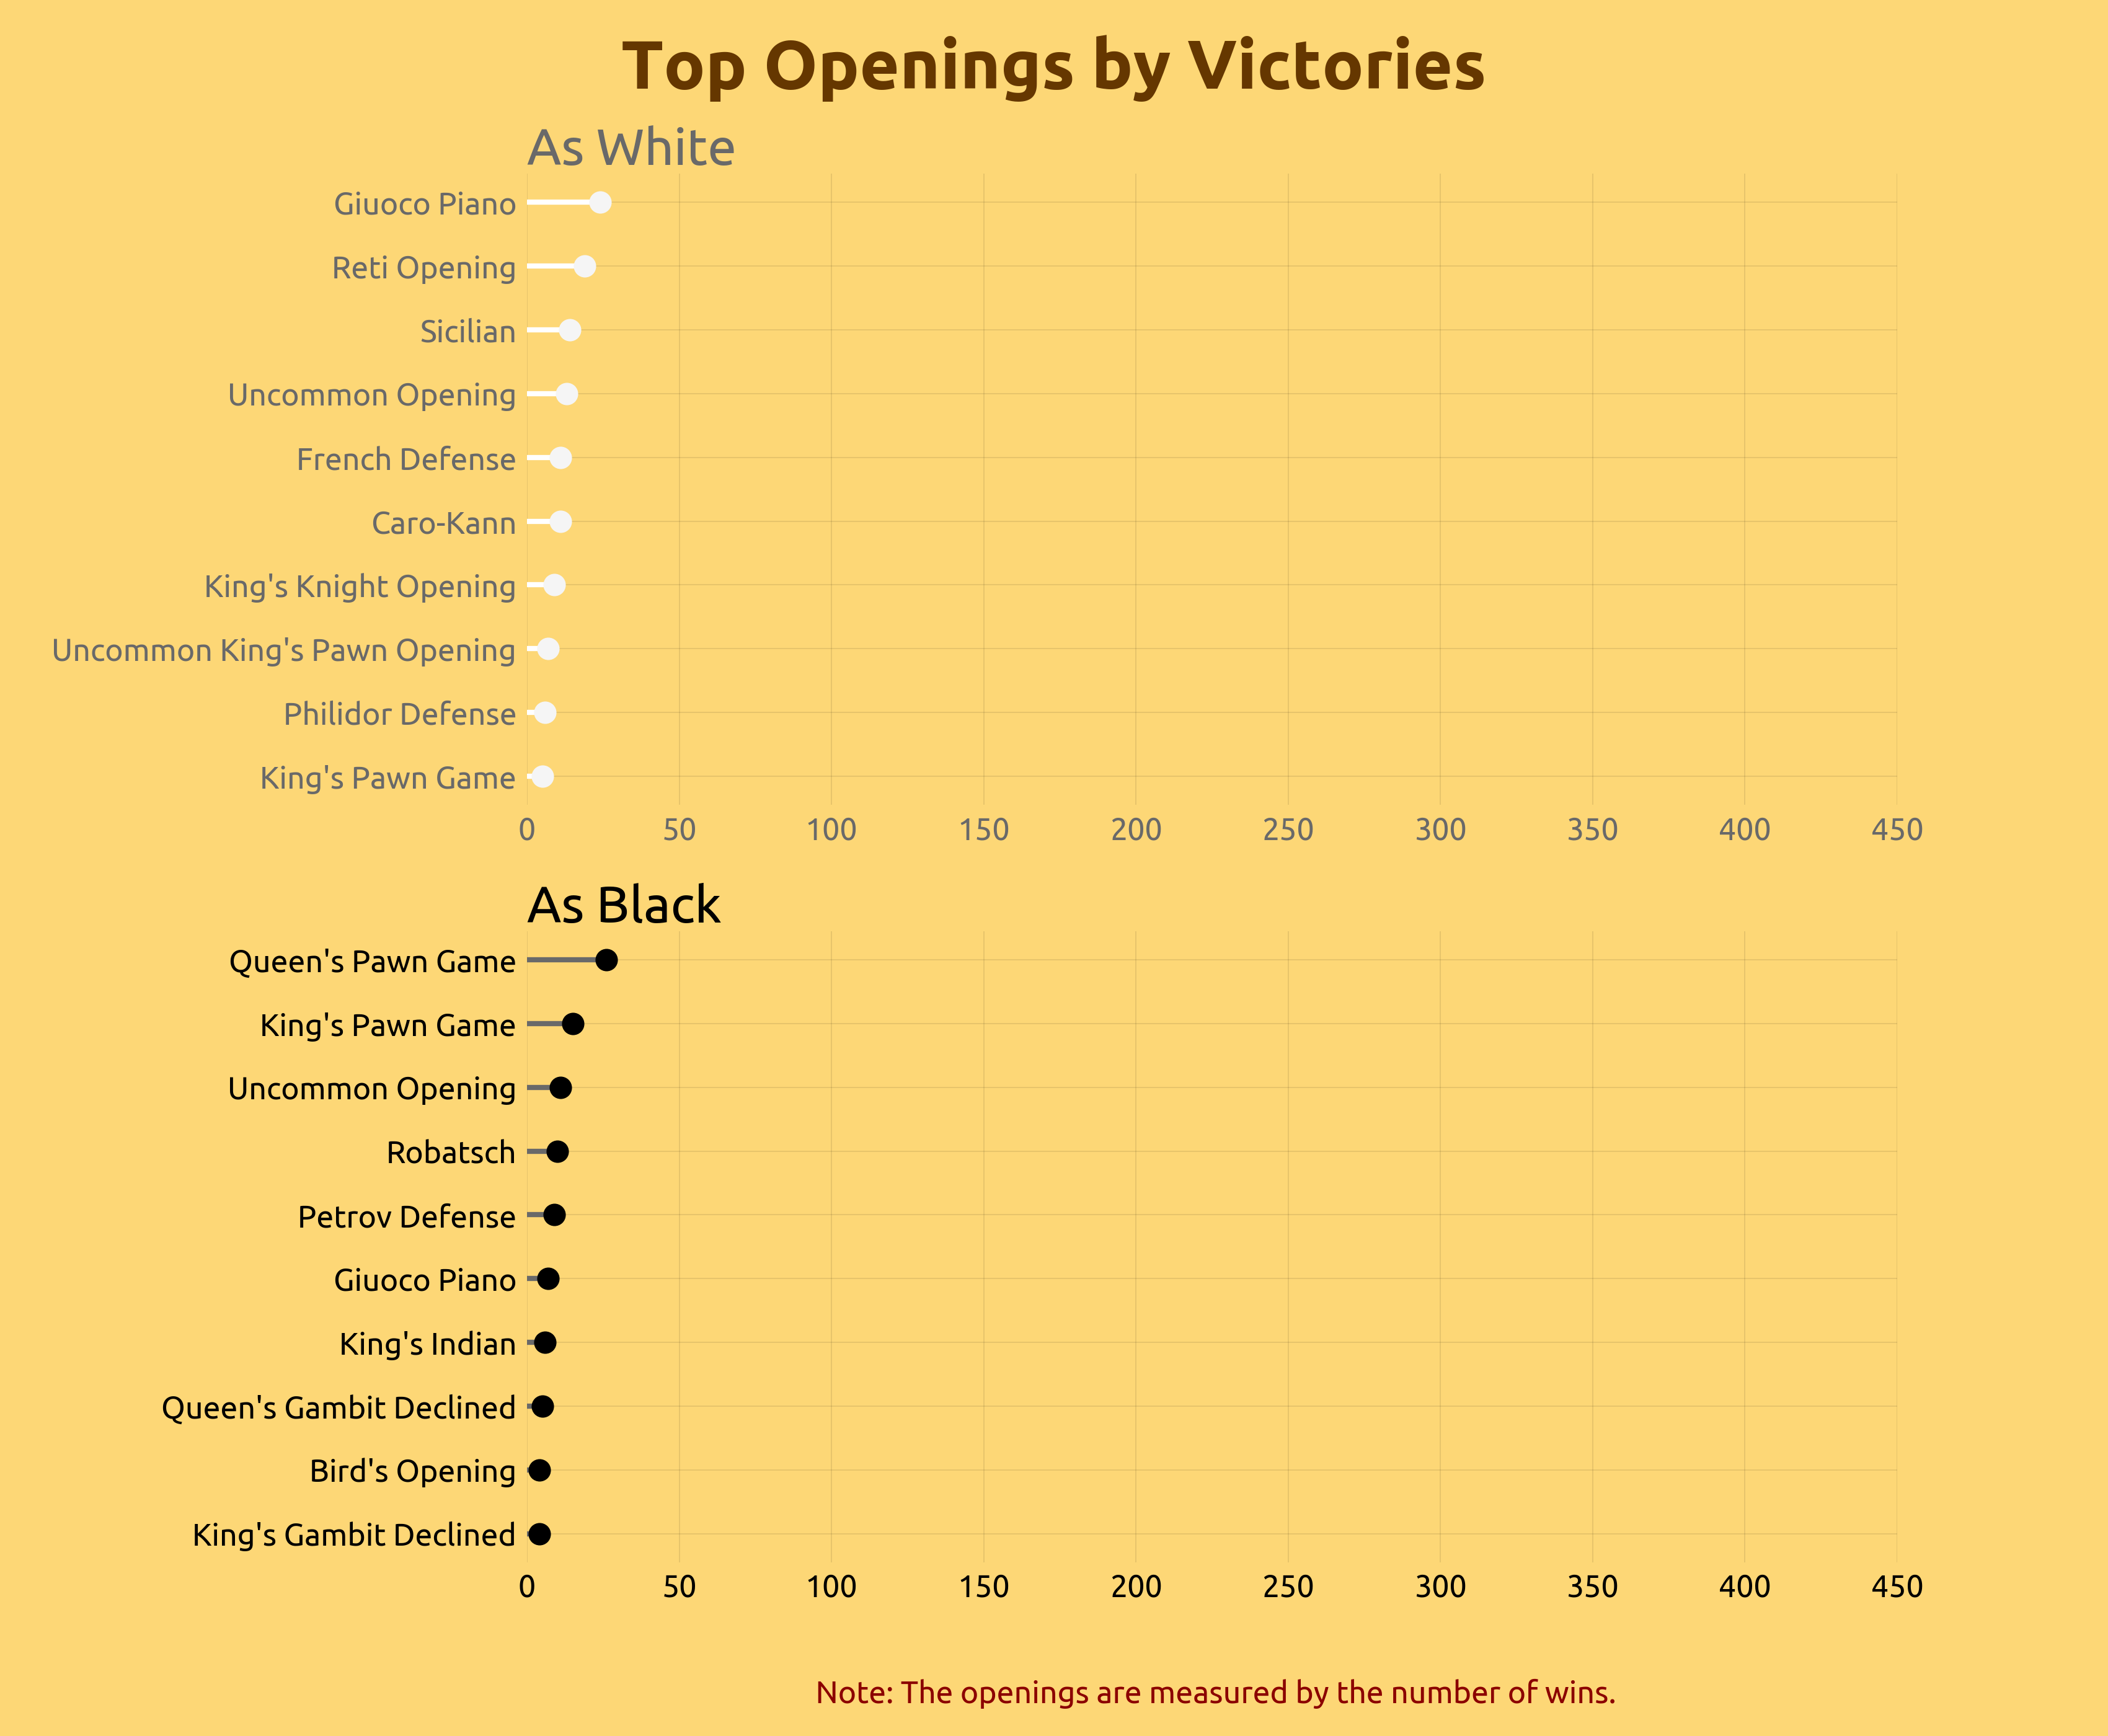

In [63]:

games_eco = games.groupby(['group_name_result','group_name_color','eco']).size().reset_index(name='counts')
games_eco = games_eco.merge(eco, on='eco', how = 'inner')
win_eco = games_eco.loc[games_eco['group_name_result'] == 'won']
win_eco['total'] = win_eco.groupby(['group_name_color', 'eco_name'])['counts'].transform('sum')
win_eco = win_eco.drop_duplicates(subset=['group_name_color', 'eco_name'])
win_eco_white = win_eco.loc[win_eco['group_name_color'] == 'white'].sort_values('total', ascending = False).head(10).sort_values('total', ascending = True)
win_eco_black = win_eco.loc[win_eco['group_name_color'] == 'black'].sort_values('total', ascending = False).head(10).sort_values('total', ascending = True)

fig, axs = plt.subplots(2, figsize =(17, 14))

axs[0].hlines(y = win_eco_white.eco_name,
           xmin = 0,
           xmax = win_eco_white.total,
           color = 'white',
           linewidth=3)

axs[0].plot(win_eco_white.total, win_eco_white.eco_name, 'o', markersize=12, color = 'whitesmoke')
axs[1].hlines(y = win_eco_black.eco_name,
               xmin = 0,
               xmax = win_eco_black.total,
               color = 'dimgray',
               linewidth=3)

axs[1].plot(win_eco_black.total, win_eco_black.eco_name, 'o', markersize=12, color = 'black')

# Remove ticks
axs[0].xaxis.set_ticks_position('none')
axs[0].yaxis.set_ticks_position('none')
axs[1].xaxis.set_ticks_position('none')
axs[1].yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    axs[0].spines[i].set_visible(False)
for i in ['top', 'bottom', 'left', 'right']:
    axs[1].spines[i].set_visible(False)
    # Setting the values for all axes.
plt.setp(axs, xlim=(0,450))

axs[0].set_title('As White', fontsize=30, color = 'dimgray', loc = 'left');
axs[1].set_title('As Black', fontsize=30, loc = 'left');

axs[0].tick_params(axis='x', colors='dimgray')
axs[0].tick_params(axis='y', colors='dimgray')

plt.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.1)

fig.patch.set_facecolor('#FDD776')
axs[0].set_facecolor('#FDD776')
axs[1].set_facecolor('#FDD776')

axs[1].set_xlabel('\n\n Note: The openings are measured by the number of wins.', color = 'darkred');
plt.suptitle('Top Openings by Victories', fontsize=40, color = 'brown');

In [63]:

games_eco = games.groupby(['group_name_result','group_name_color','eco']).size().reset_index(name='counts')
games_eco = games_eco.merge(eco, on='eco', how = 'inner')
win_eco = games_eco.loc[games_eco['group_name_result'] == 'won']
win_eco['total'] = win_eco.groupby(['group_name_color', 'eco_name'])['counts'].transform('sum')
win_eco = win_eco.drop_duplicates(subset=['group_name_color', 'eco_name'])
win_eco_white = win_eco.loc[win_eco['group_name_color'] == 'white'].sort_values('total', ascending = False).head(10).sort_values('total', ascending = True)
win_eco_black = win_eco.loc[win_eco['group_name_color'] == 'black'].sort_values('total', ascending = False).head(10).sort_values('total', ascending = True)

fig, axs = plt.subplots(2, figsize =(17, 14))

axs[0].hlines(y = win_eco_white.eco_name,
           xmin = 0,
           xmax = win_eco_white.total,
           color = 'white',
           linewidth=3)

axs[0].plot(win_eco_white.total, win_eco_white.eco_name, 'o', markersize=12, color = 'whitesmoke')
axs[1].hlines(y = win_eco_black.eco_name,
               xmin = 0,
               xmax = win_eco_black.total,
               color = 'dimgray',
               linewidth=3)

axs[1].plot(win_eco_black.total, win_eco_black.eco_name, 'o', markersize=12, color = 'black')

# Remove ticks
axs[0].xaxis.set_ticks_position('none')
axs[0].yaxis.set_ticks_position('none')
axs[1].xaxis.set_ticks_position('none')
axs[1].yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    axs[0].spines[i].set_visible(False)
for i in ['top', 'bottom', 'left', 'right']:
    axs[1].spines[i].set_visible(False)
    # Setting the values for all axes.
plt.setp(axs, xlim=(0,450))

axs[0].set_title('As White', fontsize=30, color = 'dimgray', loc = 'left');
axs[1].set_title('As Black', fontsize=30, loc = 'left');

axs[0].tick_params(axis='x', colors='dimgray')
axs[0].tick_params(axis='y', colors='dimgray')

plt.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.1)

fig.patch.set_facecolor('#FDD776')
axs[0].set_facecolor('#FDD776')
axs[1].set_facecolor('#FDD776')

axs[1].set_xlabel('\n\n Note: The openings are measured by the number of wins.', color = 'darkred');
plt.suptitle('Top Openings by Victories', fontsize=40, color = 'brown');